In [1]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np  
np.random.seed(10)  
  
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train40 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test40 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  

Using TensorFlow backend.


In [2]:
# Standardize feature data  
X_Train40_norm = X_Train40 / 255  
X_Test40_norm = X_Test40 /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)  

In [3]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25))  

In [4]:
model.add(Flatten())  
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(10, activation='softmax'))  
model.summary()  
print("")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [17]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_Train40_norm,  
                          y=y_TrainOneHot, validation_split=0.1,  
                          epochs=10, batch_size=300, verbose=2)  

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 35s - loss: 0.0448 - acc: 0.9863 - val_loss: 0.0267 - val_acc: 0.9922
Epoch 2/10
 - 35s - loss: 0.0399 - acc: 0.9875 - val_loss: 0.0263 - val_acc: 0.9922
Epoch 3/10
 - 35s - loss: 0.0383 - acc: 0.9886 - val_loss: 0.0253 - val_acc: 0.9927
Epoch 4/10
 - 33s - loss: 0.0340 - acc: 0.9892 - val_loss: 0.0284 - val_acc: 0.9913
Epoch 5/10
 - 34s - loss: 0.0312 - acc: 0.9901 - val_loss: 0.0267 - val_acc: 0.9927
Epoch 6/10
 - 34s - loss: 0.0298 - acc: 0.9905 - val_loss: 0.0236 - val_acc: 0.9930
Epoch 7/10
 - 33s - loss: 0.0272 - acc: 0.9911 - val_loss: 0.0265 - val_acc: 0.9933
Epoch 8/10
 - 35s - loss: 0.0257 - acc: 0.9916 - val_loss: 0.0278 - val_acc: 0.9923
Epoch 9/10
 - 34s - loss: 0.0258 - acc: 0.9921 - val_loss: 0.0239 - val_acc: 0.9938
Epoch 10/10
 - 34s - loss: 0.0217 - acc: 0.9934 - val_loss: 0.0274 - val_acc: 0.9930


In [18]:
import os  
  
def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()  
  
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
  
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

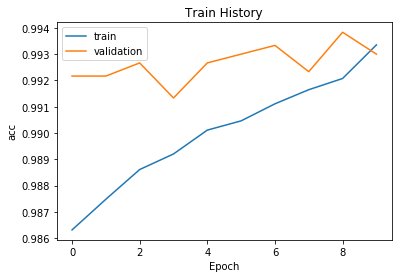

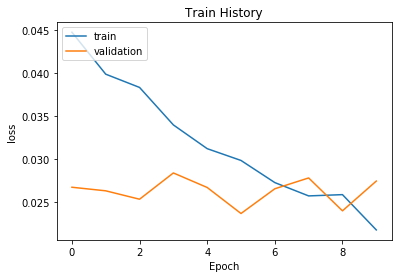

In [19]:
 
if isDisplayAvl():  
    show_train_history(train_history, 'acc', 'val_acc')  
    show_train_history(train_history, 'loss', 'val_loss')  


In [20]:
scores = model.evaluate(X_Test40_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 2s 233us/step

	[Info] Accuracy of testing data = 99.3%


In [21]:
print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test40_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  

	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



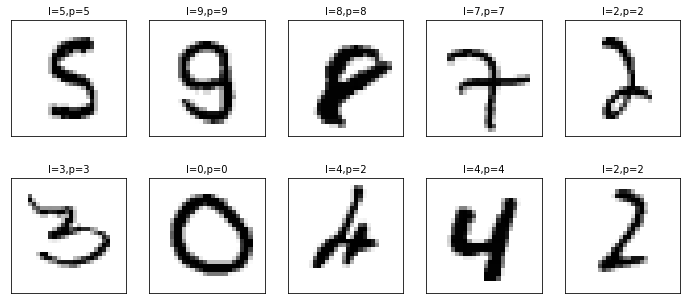

In [22]:
if isDisplayAvl():  
    plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)  


In [15]:
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))  


	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     1     0     0    0    0    2     1    0    0
1          0  1130     1     0    0    1    1     1    1    0
2          3     1  1025     0    1    0    0     2    0    0
3          0     0     0  1004    0    3    0     2    1    0
4          0     0     0     0  976    0    1     1    0    4
5          1     1     0     6    0  880    2     1    0    1
6          5     2     0     0    3    1  947     0    0    0
7          0     2     4     2    0    0    0  1017    1    2
8          4     0     3     2    1    2    0     2  957    3
9          1     3     0     2    5    1    0     3    0  994

